In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_json("NBA_player_data.json")

In [3]:
position_mapping = {"PG": 1, "SG": 2, "SF": 3, "PF": 4, "C": 5}

data = data.drop(data.columns[0], axis=1)

In [4]:
features = ["AST","BLK","TRB",  "STL", "TOV", "FG%","FGA","3P%","2P%"]
target = "Pos"

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)


In [5]:
#LOOCV
from sklearn.model_selection import LeaveOneOut, cross_val_score


k_values = range(1, 21)  # Trying k values from 1 to 20

# Perform LOOCV for each value of k
mean_accuracy_scores = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    loocv = LeaveOneOut()
    scores = cross_val_score(knn_classifier, X, y, cv=loocv)
    mean_accuracy_scores.append(scores.mean())

# Find the best k value
best_k = k_values[np.argmax(mean_accuracy_scores)]
best_accuracy = max(mean_accuracy_scores)

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train,y_train)
print(f"Best k: {best_k}")
print(f"Accuracy with best k: {best_accuracy}")
#Best k = 8


Best k: 8
Accuracy with best k: 0.5524475524475524


In [6]:
from sklearn.model_selection import cross_val_score, KFold

# Define the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=best_k) 

acc = {}

# Perform k-fold cross-validation
for i in range(5,21):
    kfold = KFold(n_splits=i)
    scores = cross_val_score(knn_classifier, X, y, cv=i)

    # Calculate the mean accuracy
    mean_accuracy = scores.mean()
    acc[i] = mean_accuracy

max_acc = max(acc.values())
max_fold = max(acc, key=acc.get)

print(f"Mean accuracy with {max_fold}-fold cross-validation: {max_acc}")
#Best fold = 14

Mean accuracy with 14-fold cross-validation: 0.5554531490015361


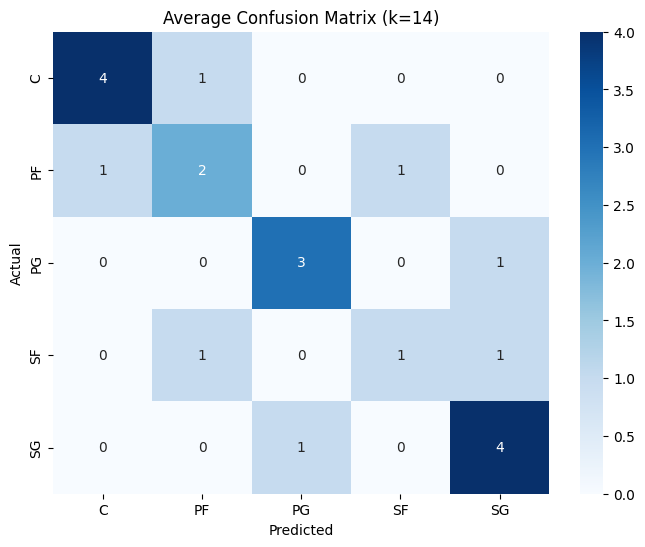

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
k = 14
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty array to store confusion matrices
conf_matrices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit LDA model
    model = knn_classifier.fit(X_train, y_train)
    
    # Make predictions
    knn_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, knn_pred)
    conf_matrices.append(cm)

# Calculate the average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0, dtype=int)

# Plot the average confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(avg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Average Confusion Matrix (k={k})')
plt.show()